# Topological Data Analysis with Persistent Homology, $1^\text{st}$ tutorial
https://raphaeltinarrage.github.io/EMAp.html
## Lesson IV: Simplicial complexes and topological invariants
Last update: 28/01/2021

### Student: Lucas Machado Moschen

In [1]:
import gudhi 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [2]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = True):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = True):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [3]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()

In [4]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [5]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [6]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [7]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [8]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [9]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


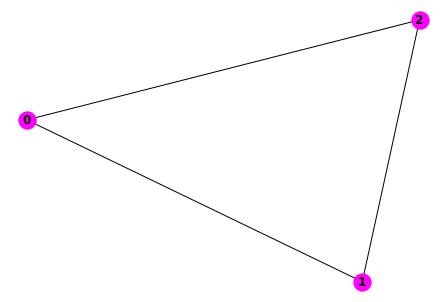

In [10]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

## Computing topological invariants

In [11]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = True)

The simplicial complex admits 1 connected component(s).


1

In [12]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex, verbose = 'True')

The simplicial complex has Euler characteristic equal to 0.


0

# Exercise 22

Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?
Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

The simplicial complex has Euler characteristic equal to 0.


0

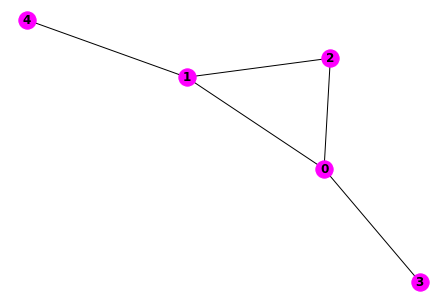

In [13]:
# We build a triangulation of the letter A

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([3,0])
simpcomplex.insert([4,1])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to -1.


-1

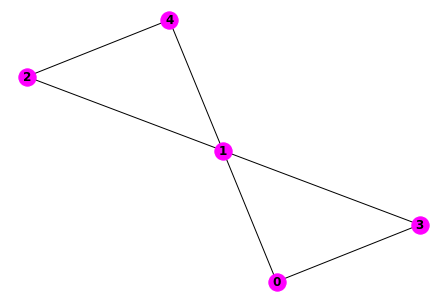

In [14]:
# We build a triangulation of the letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([1,4])
simpcomplex.insert([2,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

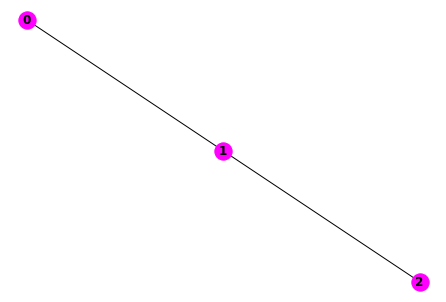

In [15]:
# We build a triangulation of the letter C

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

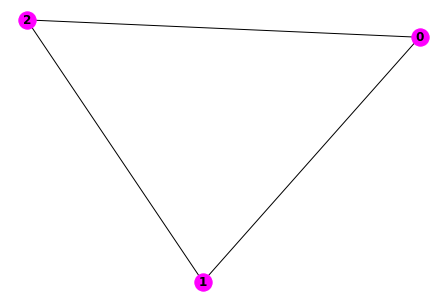

In [16]:
# We build a triangulation of the letter D

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,2])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

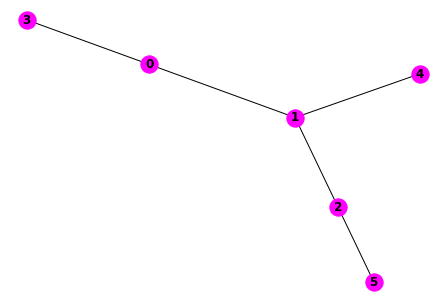

In [17]:
# We build a triangulation of the letter E

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])
simpcomplex.insert([2,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

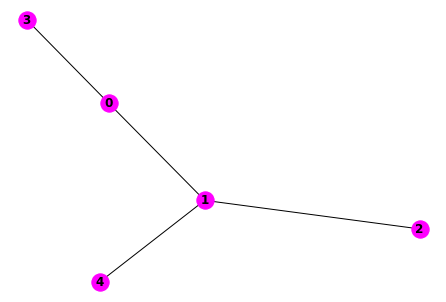

In [18]:
# We build a triangulation of the letter F

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

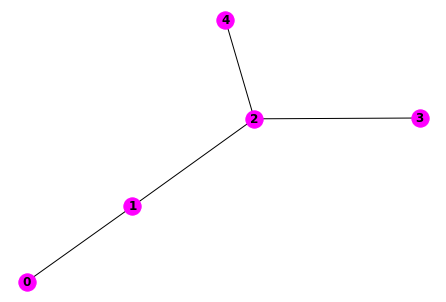

In [19]:
# We build a triangulation of the letter F

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([2,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

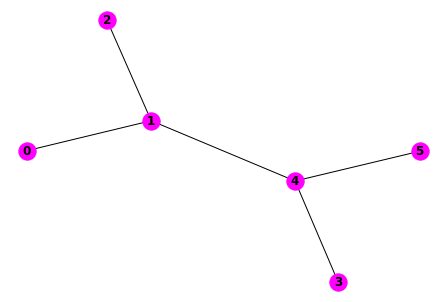

In [20]:
# We build a triangulation of the letter H

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])
simpcomplex.insert([3,4])
simpcomplex.insert([4,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

By the examples, we can say that if two letters are homotopy equivalent, they have the same Euler characteristic.

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic. 

In [21]:
def bouquet_circle(n: int, draw = False, verbose = False): 
    
    simpcomplex = gudhi.SimplexTree()
    
    for i in range(n): 
         
        simpcomplex.insert([0,2*i+1])
        simpcomplex.insert([0,2*i + 2])
        simpcomplex.insert([2*i+1,2*i+2])

    if draw: 
        DrawSimplicialComplex(simpcomplex)
    e = EulerCharacteristic(simpcomplex, verbose = verbose)
    return e

In [22]:
for n in range(20):
    e = bouquet_circle(n)
    print('The bouquet of {} circles has Euler characteristc {}'.format(n,e))

The bouquet of 0 circles has Euler characteristc 0
The bouquet of 1 circles has Euler characteristc 0
The bouquet of 2 circles has Euler characteristc -1
The bouquet of 3 circles has Euler characteristc -2
The bouquet of 4 circles has Euler characteristc -3
The bouquet of 5 circles has Euler characteristc -4
The bouquet of 6 circles has Euler characteristc -5
The bouquet of 7 circles has Euler characteristc -6
The bouquet of 8 circles has Euler characteristc -7
The bouquet of 9 circles has Euler characteristc -8
The bouquet of 10 circles has Euler characteristc -9
The bouquet of 11 circles has Euler characteristc -10
The bouquet of 12 circles has Euler characteristc -11
The bouquet of 13 circles has Euler characteristc -12
The bouquet of 14 circles has Euler characteristc -13
The bouquet of 15 circles has Euler characteristc -14
The bouquet of 16 circles has Euler characteristc -15
The bouquet of 17 circles has Euler characteristc -16
The bouquet of 18 circles has Euler characteristc -

Seems like the Euler characteristic of the bouquet of $n$ circles is $1 - n$. 

# Exercise 24

Implement the triangulation of the torus given during the notes.
Compute its Euler characteristic.

![](../images/torus-triangulation.png)

The simplicial complex has Euler characteristic equal to 0.


0

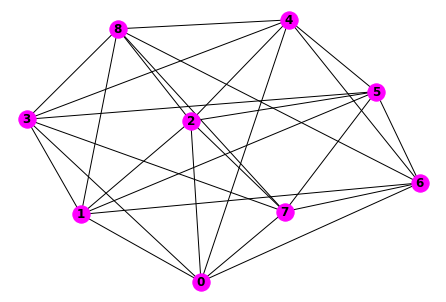

In [23]:
torus = gudhi.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([1,0,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

DrawSimplicialComplex(torus)
EulerCharacteristic(torus)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:

In [24]:
points = {0: [0.29409772548731694, 0.6646626625013836],
          1: [0.01625840776679577, 0.1676405753593595],
          2: [0.15988905150272759, 0.6411323760808338],
          3: [0.9073191075894482, -0.16417982219713312],
          4: [-0.18661467838673884, 0.31618948583046413],
          5: [-0.3664040542098381, 0.9098590694955988],
          6: [-0.43753448716144905, -0.8820102274699417],
          7: [0.4096730199915961, -0.23801426675264126],
          8: [0.5903822103474676, -0.7285102954232894],
          9: [0.9133851839417766, -0.6606557328320093],
          10: [-0.15516122940597588, 0.7565411235103017],
          11: [-0.38626186295039866, -0.3662321656058476],
          12: [0.005209710070218199, 0.27655964872153116],
          13: [0.670078068894711, -0.00932202688834849],
          14: [-0.011268465716772091, 0.24340880308017376],
          15: [-0.6441978411451603, -0.9672635759413206],
          16: [-0.2841794022401025, -0.6734801188906114],
          17: [-0.15473260248990717, -0.1365357396855129],
          18: [0.7177096105982121, 0.9378197891592468],
          19: [-0.4677068504994166, 0.1533930130294956],
          20: [-0.32379909116817096, 0.9694800649768063],
          21: [-0.2886940472879451, -0.039544695812395725],
          22: [-0.5900701743351606, 0.8350804500575086],
          23: [0.14931959728335853, 0.869106793774487],
          24: [-0.14500672678238824, -0.3170082291070364],
          25: [0.07324547392476122, 0.6653572287065117],
          26: [-0.662990048258566, 0.1908198608241125],
          27: [-0.25641262456436276, -0.9844196180941553],
          28: [-0.5105685407819842, -0.4236604017060557],
          29: [0.6792549581008038, -0.026215820387260003]}

Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [25]:
# calculates the norm between two lists
norm2 = lambda l1, l2: (l1[0] - l2[0])**2 + (l1[1] - l2[1])**2 

In [26]:
def simplical_complex(r): 
    
    assert r >= 0
    
    G = gudhi.SimplexTree()
    for i in range(30): 
        G.insert([i])
        for j in range(i+1, 30): 
            if norm2(points[i], points[j]) <= r**2: 
                G.insert([i,j])
    return G

In [27]:
r_values = np.linspace(0.02,1,1000)
c = np.zeros(1000)
for i, r in enumerate(r_values):
    G = simplical_complex(r)
    c[i] = NumberOfConnectedComponents(G, verbose = False)

We observe that it's a non increasing function of $r$. That was expected because when $r$ increases, we insert zero or more edges (we don't remove) into de graph what implies less isolated nodes and after less conected components. After 0.6, the function remais contant with only one connected component. 

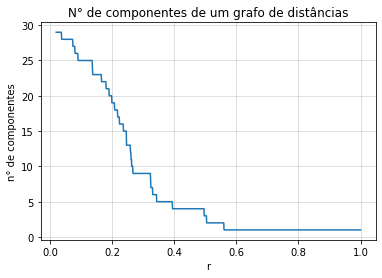

In [28]:
plt.plot(r_values, c)
plt.grid(alpha = 0.5)
plt.xlabel('r')
plt.ylabel('n° de componentes')
plt.title('N° de componentes de um grafo de distâncias')
plt.show()

# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [29]:
ro = np.random.RandomState(1000)

In [30]:
def erdos_renyi(n: int, p: float):
    
    assert 0 <= p <= 1
    
    V = []
    G = gudhi.SimplexTree()
    for i in range(n):
        V.append(i+1)
        G.insert([i+1])
    
    edges_added = 0
    for edge in itertools.combinations(V,2): 
        if ro.uniform() < p: 
            G.insert(edge)
            edges_added += 1
            
    return G, edges_added

As an example of the function usage, let's try a small graph. 

In [31]:
G, edges_added = erdos_renyi(4,0.5)

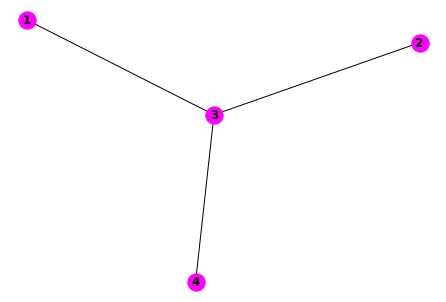

In [32]:
DrawSimplicialComplex(G)

Now let's compare the results for different $n$ and $p$. 

In [33]:
def plot_erdos(n, j1, j2):
    
    p_values = np.linspace(0,1,100)
    c = np.zeros(100)
    for i, p in enumerate(p_values):
        G, edges_added = erdos_renyi(n,p)
        if edges_added == 0: 
            # Avoid numeric problems when no edge are added
            c[i] = n
        else:
            c[i] = NumberOfConnectedComponents(G, verbose = False)

    ax[j1, j2].plot(p_values, c)
    ax[j1, j2].grid(alpha = 0.5)
    ax[j1, j2].set_title('n = {}'.format(n), fontsize = 20)

By the graphics, we note the number of components is function has a greater probability of decreses as $p$ increases. We also note that for small values of $p$ and smaller $n$ is, more irregular is the function, given the probability of something "weird" occuring is higher. We also note when $n$ increases, the convergence to one connected component, what is interesting. 

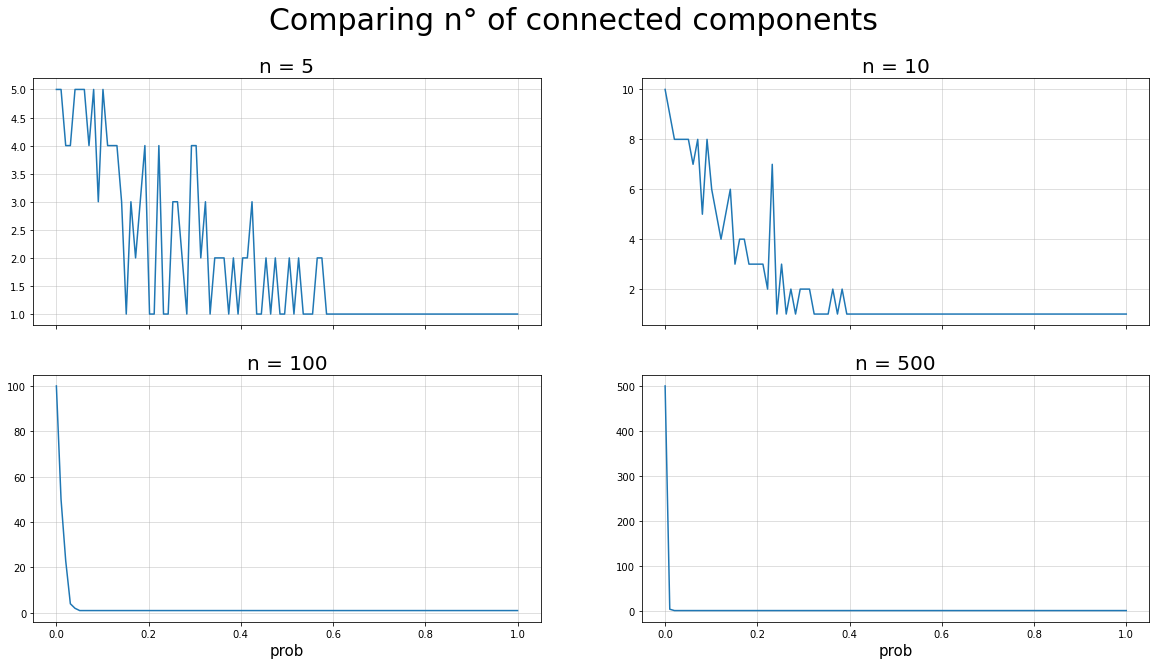

In [34]:
fig, ax = plt.subplots(2,2, figsize = (20,10), sharex = True)
fig.suptitle(r'Comparing n° of connected components', fontsize = 30)
ax[1,0].set_xlabel('prob', fontsize = 15)
ax[1,1].set_xlabel('prob', fontsize = 15)

plot_erdos(5, j1 = 0, j2 = 0)
plot_erdos(10, j1 = 0, j2 = 1)
plot_erdos(100, j1 = 1, j2 = 0)
plot_erdos(500, j1 = 1, j2 = 1)